<a href="https://colab.research.google.com/github/hex-plex/Machine-Learning-basic/blob/master/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ***1. Intro***  

Hola learners! Welcome to week 2 of CSOC (ML). This week we'll be reviewing Multi-Layered Perceptron.

The Data we are working on is the 'Wisconsin Breast Cancer Prediction Dataset'.

The dataset presents a classic machine learning problem i.e. to identify where the tumour is malignant or benign.

Before you start, know that you are free to experiment with the dataset. The given assignment is only the minimum requirement especially targetted at beginners. People with some experience can for example do some data visualization, look into using pca(principal component analysis) on features before feeding them into mlp and comparing the difference etc.


***2. What is ANN?***



2-1) ANN(Artificial Neural Network)

*   The Artificial Neural Network consists of an input layer, a hidden layer, and an output layer.![alt text](https://elogeel.files.wordpress.com/2010/05/050510_1627_multilayerp1.png)

2-2) SLP(Single Layer Perceptron)

*   If ANN model has no hidden layer, it is called single layer perceptron.![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2016/07/SLP.png)


2-3) Basic equation of ANN-SLP


*   **Output = Weight * Input + Bias**
*   For this equation, we already have output, input layers. But don't have weight value and bias value.
*   Weight : a value that can give different weights depending on features and output => [len(features), len(output)]
*   bias : a value that can give different weights depending on features => [len(output)]


2-4) MLP(Multi Layer Perceptron)


*   MLP(Multiple Layer Perceptron) model is ANN which has multiple hidden layers (more than 1)
![alt text](https://www.cc.gatech.edu/~san37/img/dl/mlp.png)


2-5) Basic equation of ANN-MLP


*   **Output = (Weight1 x Input1) + (Weight2 x Input2) + ... + (WeightN x InputN) + Bias**
*   For this equation, we already have output, input layers. But don't have weight value and bias value.
*   Weight : a value that can give different weights depending on features and output => [len(features), len(output)]
*   bias : a value that can give different weights depending on features => [len(output)]















***3. Importing the Libraries***

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***4. Explore Data***

4-1) Import data

In [2]:
wbcd = pd.read_csv("/content/wbcd.csv")
wbcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
print("This WBCD dataset is consisted of",wbcd.shape)

This WBCD dataset is consisted of (569, 33)


4-2) Eliminate the NaN values

In [0]:
wbcd=wbcd.fillna(0)
#wbcd.info()

4-3)Show summary of the diagnosis(use sns.countplot)

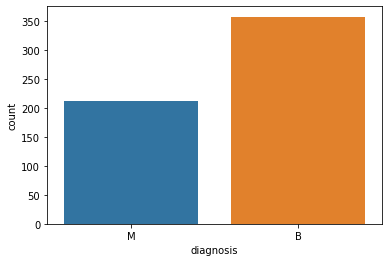

In [5]:
sns.countplot(x="diagnosis", data=wbcd)

4-4) Correlation Plot of 30 features(use sns.heatmap)

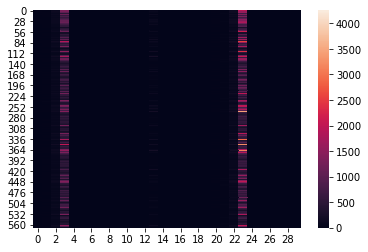

In [6]:
sns.heatmap(np.array((np.array(wbcd))[:,2:-1],dtype=np.float32))

***5. Preparing Data for machine learning***

5-1) Divide "WBCD data" into Train(70%) / Test data(30%)

> Divide the data into two(train/test) to see the predictive power of the model.



In [0]:
Xtrain,Xtest,ytrain,ytest=train_test_split(np.array((np.array(wbcd)[:,2:-1]),np.float32),np.array((np.array(wbcd)[:,1:2])=='M', np.float32),train_size=0.7,test_size=0.3)

5-2) Drop ID column
>

*   Save the ID column for later combination(results).
*   Drop the ID column in train, test datasets, because it's unnecessary for model learning predictions.



In [0]:
##its been done

5-3) Seperate x:Feature data(30) / y:Result data(1)

>Seperate by x_data, y_data 


*   List x_data : columns(features to predict diagnosis) for training. (eliminate diagnosis)
*   y_data : columns for comparing with predictions results. (need original diagnosis)





5-3-1) Normalize x_data values for better prediction using MinMaxScaler

In [0]:
scaler=MinMaxScaler()
scaler.fit(np.array(np.array(wbcd)[:,2:-1],np.float32))
Xtrain=scaler.transform(Xtrain)
Xtest=scaler.transform(Xtest)

5-3-2) Change Results(diagnosis) format : String -> Numeric

In [10]:
#its done
Xtrain.shape



(398, 30)

*** *italicized text*6. Make MLP Model***


6-1) ANN - MLP Model

*   train_x, test_x : normalization data
*   30 features
*   train_y, test_y



In [11]:
tf.random.set_seed(2)
np.random.seed(5)
import matplotlib.pyplot as plt

model = keras.Sequential([
                  keras.layers.Dense(100,input_shape=(30,),kernel_regularizer=keras.regularizers.l2(0.01),bias_regularizer=keras.regularizers.l2(0.01)),
                  keras.layers.PReLU(alpha_initializer='zeros'),
                  keras.layers.Dense(10,use_bias=True),
                  keras.layers.LeakyReLU(alpha=0.3),
                  keras.layers.Dense(1,activation="sigmoid")

])
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.Adadelta(learning_rate=0.1, rho=0.9),metrics=['binary_accuracy'])
history=model.fit(Xtrain,ytrain,epochs=1500,validation_split=0.05)
#plt.plot(history.history['val_loss'])
#plt.plot(history.history['loss'])
#plt.title('Model Loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
#plt.show()

Epoch 1/1500
12/12 [==============================] - 0s 17ms/step - loss: 1.1631 - binary_accuracy: 0.6058 - val_loss: 1.1521 - val_binary_accuracy: 0.6000
Epoch 2/1500
12/12 [==============================] - 0s 4ms/step - loss: 1.1512 - binary_accuracy: 0.6138 - val_loss: 1.1421 - val_binary_accuracy: 0.6500
Epoch 3/1500
12/12 [==============================] - 0s 5ms/step - loss: 1.1400 - binary_accuracy: 0.6296 - val_loss: 1.1317 - val_binary_accuracy: 0.6500
Epoch 4/1500
12/12 [==============================] - 0s 4ms/step - loss: 1.1291 - binary_accuracy: 0.6376 - val_loss: 1.1214 - val_binary_accuracy: 0.6500
Epoch 5/1500
12/12 [==============================] - 0s 4ms/step - loss: 1.1171 - binary_accuracy: 0.6667 - val_loss: 1.1105 - val_binary_accuracy: 0.7000
Epoch 6/1500
12/12 [==============================] - 0s 5ms/step - loss: 1.1053 - binary_accuracy: 0.7011 - val_loss: 1.0992 - val_binary_accuracy: 0.6500
Epoch 7/1500
12/12 [==============================] - 0s 4ms/st

***7. Results***

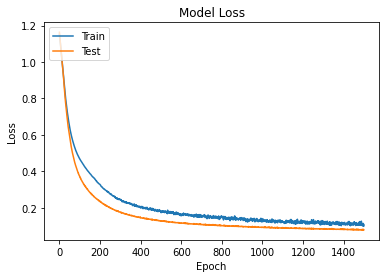

In [12]:
#Make predictions with your model on the test set you have created
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
pred=model.predict(Xtest)
from sklearn.metrics import f1_score
print("F1 score of my model :")
predfinal=(np.array((pred>0.8),np.float32))
print(f1_score(predfinal,ytest))

F1 score of my model :
0.967741935483871
